# Web Traffic Time Series Forecasting

### Forecast future traffic to Wikipedia pages

This competition focuses on the problem of forecasting the future values of multiple time series, as it has always been one of the most challenging problems in the field. More specifically, we aim the competition at testing state-of-the-art methods designed by the participants, on the problem of forecasting future web traffic for approximately 145,000 Wikipedia articles.

For each time series, you are provided the name of the article as well as the type of traffic that this time series represent (all, mobile, desktop, spider). You may use this metadata and any other publicly available data to make predictions. 

Unfortunately, the data source for this dataset does not distinguish between traffic values of zero and missing values. A missing value may mean the traffic was zero or that the data is not available for that day.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('../data/raw/train_1.csv.zip', compression='zip', encoding='iso-8859-1')
keys = pd.read_csv('../data/raw/key_1.csv.zip', compression='zip', encoding='iso-8859-1')

In [3]:
raw.head(15)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [4]:
keys.head(15)

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a
5,!vote_en.wikipedia.org_all-access_all-agents_2...,48f1e93517a2
6,!vote_en.wikipedia.org_all-access_all-agents_2...,5def418fcb36
7,!vote_en.wikipedia.org_all-access_all-agents_2...,77bd08134351
8,!vote_en.wikipedia.org_all-access_all-agents_2...,5889e6dbb16f
9,!vote_en.wikipedia.org_all-access_all-agents_2...,5f21fef1d764


In [5]:
raw.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [6]:
keys.describe()

,Page,Id
count,8703780,8703780
unique,8703780,8703780
top,"Ð¡Ð°ÑÐ¾Ð½Ð¾Ð²Ð°,_ÐÐ»ÐµÐ½Ð°_ÐÑÐµÐ²Ð¾Ð»Ð¾Ð´Ð...",1bdbb590e344
freq,1,1


In [7]:
# Page views are integers, let's downcast floats to ints
for col in raw.columns[1:]:
    raw[col] = pd.to_numeric(raw[col], downcast='integer')

## Pagename preprocessing

Each row consists of a page and a set of observations per date. The page contains a set of useful looking info we should try to extract.

Each article name has the following format: 'name_project_access_agent' (e.g. 'AKB48_zh.wikipedia.org_all-access_spider'). Let's parse the Page column, but by checking the number of underscores we see that we don't consistently have four. We can bet that only article names have underscores.

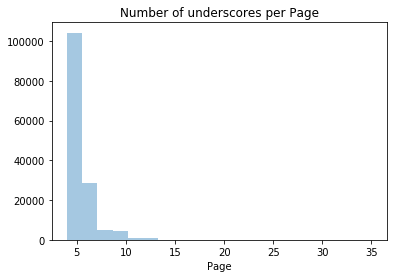

In [8]:
sns.distplot(raw['Page'].apply(lambda x: len(str(x).split('_'))), kde=False, bins=20).set_title("Number of underscores per Page")

In [9]:
# Show we have only two kinds of agents
print(raw['Page'].apply(lambda x: str(x).split('_')[-1]).unique())

# Show we have only three kinds of accesses
print(raw['Page'].apply(lambda x: str(x).split('_')[-2]).unique())

# Show we have only a small set of Wikipedia projects
print(raw['Page'].apply(lambda x: str(x).split('_')[-3]).unique())

# general conclusion is we can safely parse in reverse

['spider' 'all-agents']
['all-access' 'desktop' 'mobile-web']
['zh.wikipedia.org' 'fr.wikipedia.org' 'en.wikipedia.org'
 'commons.wikimedia.org' 'ru.wikipedia.org' 'www.mediawiki.org'
 'de.wikipedia.org' 'ja.wikipedia.org' 'es.wikipedia.org']


In [10]:
def parsePage(page):
    input = str(page).split('_')
    output = []
    output.append(input.pop())
    output.append(input.pop())
    output.append(input.pop())
    output.append('_'.join(input))
    return pd.Series(output)

page_details = pd.DataFrame(raw['Page'].apply(parsePage))
page_details.columns = ["agent", "access", "project", "pagename"]

In [11]:
page_details.describe()

,agent,access,project,pagename
count,145063,145063,145063,145063
unique,2,3,9,49174
top,all-agents,all-access,en.wikipedia.org,Special:Search
freq,110150,74315,24108,35


In [12]:
df = pd.concat([raw, page_details], axis=1)

In [13]:
df.to_csv('../data/processed/df.csv', encoding='utf-8', index=False)

## Visualizing data

In [14]:
test = pd.read_csv('../data/processed/df.csv')

In [15]:
test.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,agent,access,project,pagename
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,spider,all-access,zh.wikipedia.org,2NE1
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,spider,all-access,zh.wikipedia.org,2PM
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,spider,all-access,zh.wikipedia.org,3C
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,spider,all-access,zh.wikipedia.org,4minute
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,spider,all-access,zh.wikipedia.org,52_Hz_I_Love_You


In [16]:
# found a lovely function for graphing in https://www.kaggle.com/dextrousjinx/brief-insight-on-web-traffic-time-series
def graph_by(df, plot_hue, graph_columns):
    train_project_df = df.groupby(plot_hue).sum().T
    train_project_df.index = pd.to_datetime(train_project_df.index)
    train_project_df = train_project_df.groupby(pd.TimeGrouper('M')).mean().dropna()
    train_project_df['month'] = 100*train_project_df.index.year + train_project_df.index.month
    train_project_df = train_project_df.reset_index(drop=True)
    train_project_df = pd.melt(train_project_df, id_vars=['month'], value_vars=graph_columns)
    fig = plt.figure(1,figsize=[12,10])
    ax = sns.pointplot(x="month", y="value", hue=plot_hue, data=train_project_df)
    ax.set(xlabel='Year-Month', ylabel='Mean Hits')

In [ ]:
project_columns = page_details['project'].unique()
access_columns = page_details['access'].unique()
agents_columns = page_details['agent'].unique()

In [ ]:
graph_by(test, "project", project_columns)

In [ ]:
graph_by(test, "access", access_columns)

In [ ]:
graph_by(test, "agent", agents_columns)

check 
* https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration
* https://www.kaggle.com/headsortails/wiki-traffic-forecast-exploration-wtf-eda